In [8]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt

# Import the trees from sklearn
from sklearn import tree


# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score


# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV


# Use inline so our visualizations display in notebook
%matplotlib inline

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse


from statsmodels.stats.outliers_influence import variance_inflation_factor


from statsmodels.api import qqplot


## #1 Inspect and explore data.

In [9]:
df = pd.read_csv('data/realistic_climate_change_impacts.csv')
df.head()

,RecordID,Date,Country,TemperatureAnomaly_C,CO2Level_ppm,ExtremeWeatherEvent,EconomicImpact_USD,PopulationAffected
0,07cecceb-69e6-47eb-a19b-34d6824cdea8,2019-11-17,India,-0.15,410.44,Drought,8630289.48,375036
1,a6e7e2a5-00ea-4af2-b151-a1a63386e436,2014-05-18,Australia,-0.03,376.37,Tornado,1379227.03,274952
2,6890cfe8-21d3-4c0d-9b6a-e543e308c06e,2002-04-15,Japan,0.55,362.97,Wildfire,1093567.72,4422930
3,ac61117f-9b84-4327-be46-67a8d84bca24,2013-10-13,India,-0.51,396.67,Flood,5260336.62,2122860
4,2df860a5-07e4-4832-a344-ae198276cdb8,2020-10-15,USA,1.78,367.59,Wildfire,4567592.01,2433756


In [10]:
print(df.dtypes)

RecordID                 object
Date                     object
Country                  object
TemperatureAnomaly_C    float64
CO2Level_ppm            float64
ExtremeWeatherEvent      object
EconomicImpact_USD      float64
PopulationAffected        int64
dtype: object


In [11]:
df_energy = pd.read_csv('data/energy.csv')
df_energy.head()

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


In [12]:
#making a year column to match the one in the second dataset
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime
df['Year'] = df['Date'].dt.year  # Extract the year

# Display the updated DataFrame
df.head()


,RecordID,Date,Country,TemperatureAnomaly_C,CO2Level_ppm,ExtremeWeatherEvent,EconomicImpact_USD,PopulationAffected,Year
0,07cecceb-69e6-47eb-a19b-34d6824cdea8,2019-11-17,India,-0.15,410.44,Drought,8630289.48,375036,2019
1,a6e7e2a5-00ea-4af2-b151-a1a63386e436,2014-05-18,Australia,-0.03,376.37,Tornado,1379227.03,274952,2014
2,6890cfe8-21d3-4c0d-9b6a-e543e308c06e,2002-04-15,Japan,0.55,362.97,Wildfire,1093567.72,4422930,2002
3,ac61117f-9b84-4327-be46-67a8d84bca24,2013-10-13,India,-0.51,396.67,Flood,5260336.62,2122860,2013
4,2df860a5-07e4-4832-a344-ae198276cdb8,2020-10-15,USA,1.78,367.59,Wildfire,4567592.01,2433756,2020


In [13]:
# Perform the merge on both 'Country' and 'Year' columns
merged_df = pd.merge(df, df_energy, on=['Country', 'Year'], how='inner')  # Change 'how' to 'outer', 'left', or 'right' as needed

# Display the resulting DataFrame
merged_df.head()

,RecordID,Date,Country,TemperatureAnomaly_C,CO2Level_ppm,ExtremeWeatherEvent,EconomicImpact_USD,PopulationAffected,Year,Unnamed: 0,Energy_type,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,07cecceb-69e6-47eb-a19b-34d6824cdea8,2019-11-17,India,-0.15,410.44,Drought,8630289.48,375036,2019,54648,all_energy_types,31.782739,17.785372,9310.29,1368140.0,23.230619,3.413722,2308.332020
1,07cecceb-69e6-47eb-a19b-34d6824cdea8,2019-11-17,India,-0.15,410.44,Drought,8630289.48,375036,2019,54649,coal,16.265289,11.666316,9310.29,1368140.0,23.230619,3.413722,1589.042006
2,07cecceb-69e6-47eb-a19b-34d6824cdea8,2019-11-17,India,-0.15,410.44,Drought,8630289.48,375036,2019,54650,natural_gas,2.346637,1.158082,9310.29,1368140.0,23.230619,3.413722,121.482030
3,07cecceb-69e6-47eb-a19b-34d6824cdea8,2019-11-17,India,-0.15,410.44,Drought,8630289.48,375036,2019,54651,petroleum_n_other_liquids,9.812736,1.618734,9310.29,1368140.0,23.230619,3.413722,597.807983
4,07cecceb-69e6-47eb-a19b-34d6824cdea8,2019-11-17,India,-0.15,410.44,Drought,8630289.48,375036,2019,54652,nuclear,0.492139,0.492139,9310.29,1368140.0,23.230619,3.413722,0.000000


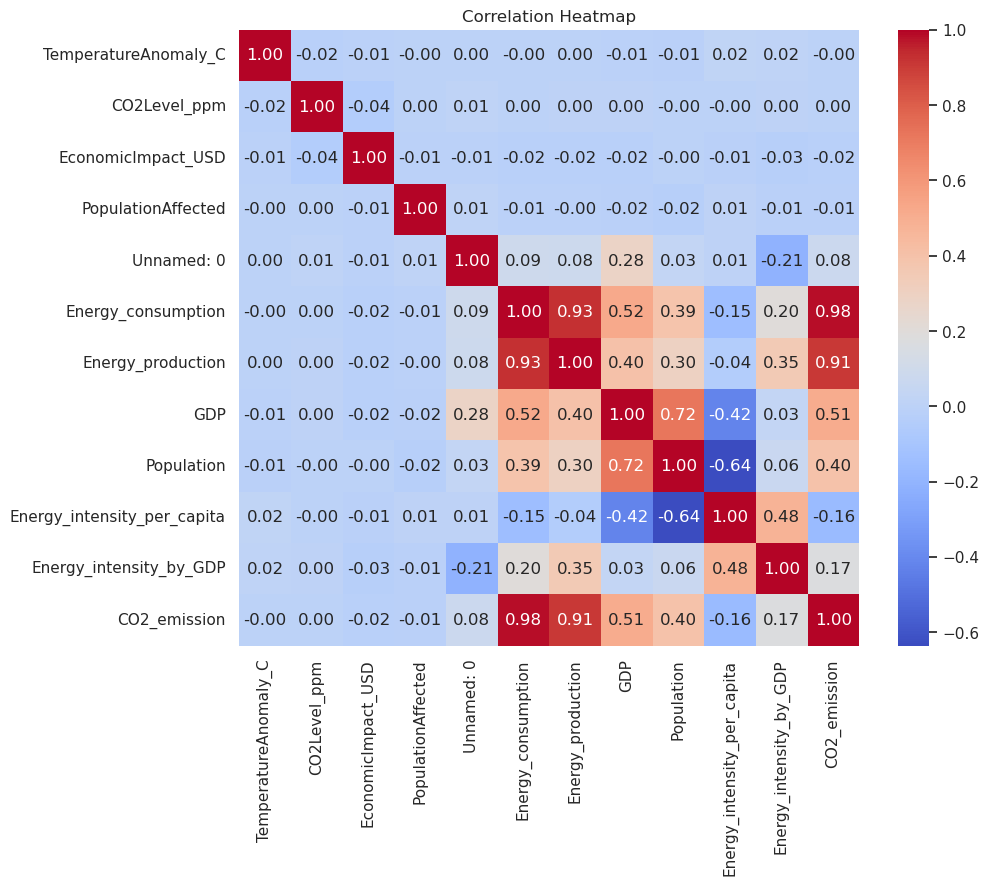

In [14]:
# Select only the numeric columns
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [15]:
# Check for null values
df.isnull().sum()

RecordID                   0
Date                       0
Country                    0
TemperatureAnomaly_C       0
CO2Level_ppm               0
ExtremeWeatherEvent     1384
EconomicImpact_USD         0
PopulationAffected         0
Year                       0
dtype: int64

In [16]:
#Check for duplicates
df.duplicated().sum()

0

In [17]:
#Description
df.describe()

,Date,TemperatureAnomaly_C,CO2Level_ppm,EconomicImpact_USD,PopulationAffected,Year
count,10000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000
mean,2011-12-16 00:25:29.280000,-0.003239,384.896157,4.976092e+06,2.486640e+06,2011.461400
min,2000-01-04 00:00:00,-2.000000,350.000000,1.870100e+02,1.347000e+03,2000.000000
25%,2005-12-02 00:00:00,-0.990000,367.360000,2.482063e+06,1.227249e+06,2005.000000
50%,2011-12-08 12:00:00,-0.010000,384.580000,4.958593e+06,2.479959e+06,2011.000000
75%,2017-12-27 00:00:00,0.980000,402.310000,7.493504e+06,3.729956e+06,2017.000000
max,2023-12-31 00:00:00,2.000000,419.990000,9.998486e+06,4.999716e+06,2023.000000
std,NaN,1.151435,20.114265,2.883940e+06,1.446916e+06,6.971253


## #2 Select and engineer features.

In [18]:
selected_features=['Energy_consumption', 'Energy_production', 'GDP']

In [19]:
# Define our `X` and `y`
X= merged_df[selected_features]
y= merged_df['CO2_emission']


In [20]:
# Split our data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.2, random_state=45)

print('Length of our Training data:', X_train.shape[0], '\nLength of our Testing data:', X_test.shape[0])

Length of our Training data: 35937 
Length of our Testing data: 8985


## #3 Build and train model.

In [24]:
params = { 
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],}

In [25]:
# Initialize and train the RandomForestRegressor
model= RandomForestRegressor(random_state=42)
grid_search_cv = GridSearchCV(estimator=model, param_grid=params,  scoring="r2")
grid_search_cv.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [26]:
# Print the best parameters it found
print(grid_search_cv.best_params_)


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [27]:
# This command gives you rf that has the best r2
model = grid_search_cv.best_estimator_

## #4 Evaluate model.

In [28]:
# Make predictions
y_pred = model.predict(X) 

# Calculate R^2
r_squared = round(metrics.r2_score(y, y_pred),2)

# Calculate RMSE
model_root_mean_squared_error = round(rmse(y, y_pred),3)

# Print the summary of the model


# Print model description
print('\n'*2)
print("#"*79)
print("Predicting:", 'CO2_emission')
print("Using:",  selected_features)

# Print eval metrics
print('#'*79)
print('R-Squared Score:', r_squared)
print('RMSE:', model_root_mean_squared_error)
print('Dependent Variable %s average: ' % 'CO2_emission', y.mean().round(3))





###############################################################################
Predicting: CO2_emission
Using: ['Energy_consumption', 'Energy_production', 'GDP']
###############################################################################
R-Squared Score: 1.0
RMSE: 0.0
Dependent Variable CO2_emission average:  528.666


In [29]:
# Now lets look at our feature importances
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
0,0.939146,Energy_consumption
2,0.038131,GDP
1,0.022723,Energy_production
